In [29]:
import numpy as np
import pandas as pd
import warnings
#Comment this to turn on warnings
#warnings.filterwarnings('ignore')

np.random.seed() # shuffle random seed generator

# Ising model parameters
L=40 # linear system size
J=-1.0 # Ising interaction
T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit

In [30]:
import pickle, os
from urllib.request import urlopen 


#DATA
data = pd.read_pickle("Ising2DFM_reSample_L40_T=All.pkl") 

data = np.unpackbits(data).reshape(-1, 1600) 

data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

#LABELS (convention is 1 for ordered states and 0 for disordered states)
labels = pd.read_pickle("Ising2DFM_reSample_L40_T=All_labels.pkl")




In [31]:

unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))



Frequency of unique values of the said array:
[[    0     1]
 [70000 90000]]


<h2>   There are 70K instances of class 0 and 90K instances of class 1. So we can assume that there would not arise  any class imbalance problem. 
However, if the classifier is unable to supersede the baseline classifier/ dummy classifier then we may adopt any oversampling strategyy like SMOTE, ADASYN or WGAN to  oversample class '0' and create a balance .   </h2>


In [32]:
from sklearn.model_selection import train_test_split

###### define ML parameters
num_classes=2
train_to_test_ratio=0.5 # training samples

# divide data into ordered, critical and disordered
X_ordered=data[:70000,:]
Y_ordered=labels[:70000]

X_critical=data[70000:100000,:]
Y_critical=labels[70000:100000]

X_disordered=data[100000:,:]
Y_disordered=labels[100000:]

del data,labels

# define training and test data sets
X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))

# pick random data points from ordered and disordered states 
# to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=train_to_test_ratio,test_size=1.0-train_to_test_ratio)

# full data set
X=np.concatenate((X_critical,X))
Y=np.concatenate((Y_critical,Y))

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_critical.shape[0], 'critical samples')
print(X_test.shape[0], 'test samples')

X_train shape: (65000, 1600)
Y_train shape: (65000,)

65000 train samples
30000 critical samples
65000 test samples


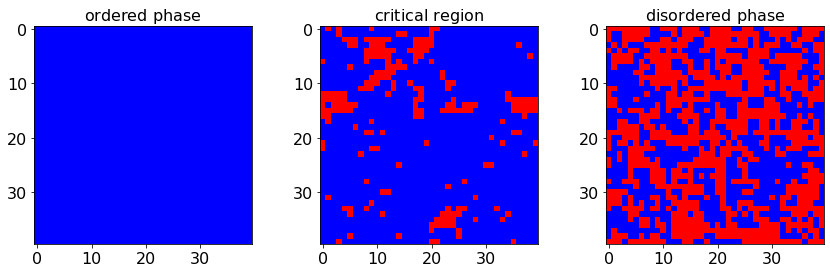

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# set colourbar map
cmap_args=dict(cmap="bwr")

# plot states
fig, axarr = plt.subplots(nrows=1, ncols=3)

axarr[0].imshow(X_ordered[20001].reshape(L,L),**cmap_args)
axarr[0].set_title('$\\mathrm{ordered\\ phase}$',fontsize=16)
axarr[0].tick_params(labelsize=16)

axarr[1].imshow(X_critical[10001].reshape(L,L),**cmap_args)
axarr[1].set_title('$\\mathrm{critical\\ region}$',fontsize=16)
axarr[1].tick_params(labelsize=16)

im=axarr[2].imshow(X_disordered[50001].reshape(L,L),**cmap_args)
axarr[2].set_title('$\\mathrm{disordered\\ phase}$',fontsize=16)
axarr[2].tick_params(labelsize=16)

fig.subplots_adjust(right=2.0)

plt.show()

<h2> Let us start with Simple Linear Classifiers. Then we would move onto more  complicated ones </h2>

In [34]:
from sklearn.linear_model import LogisticRegression

logclf = LogisticRegression()

logclf.fit(X_train,Y_train)

train_accuracy= logclf.score(X_train,Y_train)

test_accuracy= logclf.score(X_test,Y_test)

critical_accuracy= logclf.score(X_critical,Y_critical)

print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("Critical accuracy: ",critical_accuracy)

Train accuracy:  0.7263076923076923
Test accuracy:  0.6881692307692308
Critical accuracy:  0.6233666666666666


<h3> Hyper Parameter Tuning the Logistic Regression model to find out the best Hyper-Parameters that yield best accuracy. </h3>

In [35]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(--6,6,15), "penalty":["l1","l2"]}


# 10 Fold cross validation 


logreg_cv=GridSearchCV(LogisticRegression(),grid)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.6910923076923077


In [37]:
train_accuracy= logreg_cv.score(X_train,Y_train)

test_accuracy= logreg_cv.score(X_test,Y_test)

critical_accuracy= logreg_cv.score(X_critical,Y_critical)

print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("Critical accuracy: ",critical_accuracy)

Train accuracy:  0.7263076923076923
Test accuracy:  0.6881692307692308
Critical accuracy:  0.6233666666666666


In [36]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()

rfclf.fit(X_train,Y_train)

train_accuracy= rfclf.score(X_train,Y_train)

test_accuracy= rfclf.score(X_test,Y_test)

critical_accuracy= rfclf.score(X_critical,Y_critical)

print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("Critical accuracy: ",critical_accuracy)


Train accuracy:  1.0
Test accuracy:  1.0
Critical accuracy:  0.8394333333333334
